# Data import

In this section we import the chosen five different data sets (finance, news, movies, twitter and reddit). Each data frame will haev the same formatting, only retaining three columns:
- text: text input
- ground_truth: sentiment label (positive, negative, neutral)
- topic: indicates from which dataset the observations comes from (finance, news, movies, twitter, reddit)

In [1]:
#! pip install kagglehub

In [2]:
import kagglehub
import pandas as pd
import os

In [3]:
# finance data

path = kagglehub.dataset_download("sbhatti/financial-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/financial-sentiment-analysis


In [4]:
csv_file = os.path.join(path, "data.csv")

df_finance = pd.read_csv(csv_file, encoding="ISO-8859-1")

In [5]:
df_finance.rename(columns={df_finance.columns[0]: "text"}, inplace=True)
df_finance.rename(columns={df_finance.columns[1]: "ground_truth"}, inplace=True)
df_finance["topic"] = "finance"

df_finance.head()

,text,ground_truth,topic
0,The GeoSolutions technology will leverage Bene...,positive,finance
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,finance
2,"For the last quarter of 2010 , Componenta 's n...",positive,finance
3,According to the Finnish-Russian Chamber of Co...,neutral,finance
4,The Swedish buyout firm has sold its remaining...,neutral,finance


In [6]:
# news data

path = kagglehub.dataset_download("cashbowman/sentiment-labeled-headlines")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-labeled-headlines


In [7]:
path = os.path.join(path, 'Sentiments', 'guardian_sentiment.csv')

df_news = pd.read_csv(path, encoding="UTF-8")

In [8]:
df_news.head()

,Unnamed: 0,Time,Headlines,Sentiment
0,0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,4
1,1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...,1
2,2,18-Jul-20,Five key areas Sunak must tackle to serve up e...,5
3,3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...,1
4,4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,5


In [9]:
df_news.rename(columns={df_news.columns[2]: "text"}, inplace=True)
df_news.rename(columns={df_news.columns[3]: "ground_truth"}, inplace=True)
df_news["topic"] = "news"
df_news = df_news[["text", "ground_truth", "topic"]]

df_news.head()


,text,ground_truth,topic
0,Johnson is asking Santa for a Christmas recovery,4,news
1,‘I now fear the worst’: four grim tales of wor...,1,news
2,Five key areas Sunak must tackle to serve up e...,5,news
3,Covid-19 leaves firms ‘fatally ill-prepared’ f...,1,news
4,The Week in Patriarchy \n\n\n Bacardi's 'lad...,5,news


In this data set, the default sentiment classification is a five-step scale. We will map these to have very negative (1) as negative, neutral (3) as neutral and very positive (5) as positive. We will drop observations that are rated 2 (negative) and 4 (positive) to only have clear cases and stronger sentiment intensity in our observaitons.

In [10]:
mapping = {1: "negative", 3: "neutral", 5: "positive"}

# Apply mapping to the "ground_truth" column
df_news["ground_truth"] = df_news["ground_truth"].map(mapping)


In [11]:
df_news.dropna()

,text,ground_truth,topic
1,‘I now fear the worst’: four grim tales of wor...,negative,news
2,Five key areas Sunak must tackle to serve up e...,positive,news
3,Covid-19 leaves firms ‘fatally ill-prepared’ f...,negative,news
4,The Week in Patriarchy \n\n\n Bacardi's 'lad...,positive,news
5,English councils call for smoking ban outside ...,negative,news
...,...,...,...
17794,Hundreds to lose jobs as Britvic shuts down No...,negative,news
17795,How investing in solar energy can create a bri...,positive,news
17796,Poundland suppliers hit by insurance downgrade,negative,news
17798,Unilever sells household name spreads to KKR f...,negative,news


In [12]:
# reddit data

path = kagglehub.dataset_download("cosmos98/twitter-and-reddit-sentimental-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/twitter-and-reddit-sentimental-analysis-dataset


In [13]:
csv_file = os.path.join(path, "Reddit_Data.csv")

df_reddit = pd.read_csv(csv_file, encoding="ISO-8859-1")

In [14]:
df_reddit["topic"] = "reddit"
df_reddit.rename(columns={df_reddit.columns[0]: "text"}, inplace=True)
df_reddit.rename(columns={df_reddit.columns[1]: "ground_truth"}, inplace=True)

The dataset labels the sentiment as -1 (negative), 0 (neutral) and 1 (positive). For conformity with other data sets, this is mapped to text labels.

In [15]:
# Define the mapping
mapping = {-1: "negative", 0: "neutral", 1: "positive"}

# Apply mapping to the "ground_truth" column
df_reddit["ground_truth"] = df_reddit["ground_truth"].map(mapping)


In [16]:
df_reddit.head()

,text,ground_truth,topic
0,family mormon have never tried explain them t...,positive,reddit
1,buddhism has very much lot compatible with chr...,positive,reddit
2,seriously don say thing first all they won get...,negative,reddit
3,what you have learned yours and only yours wha...,neutral,reddit
4,for your own benefit you may want read living ...,positive,reddit


In [17]:
# twitter data

csv_file = os.path.join(path, "Twitter_Data.csv")

#df = pd.read_csv(csv_file)
df_twitter = pd.read_csv(csv_file, encoding="UTF-8")

In [18]:
df_twitter["topic"] = "twitter"
df_twitter.rename(columns={df_twitter.columns[0]: "text"}, inplace=True)
df_twitter.rename(columns={df_twitter.columns[1]: "ground_truth"}, inplace=True)

In [19]:
df_twitter["ground_truth"] = df_twitter["ground_truth"].map(mapping)

In [20]:
df_twitter.head()

,text,ground_truth,topic
0,when modi promised “minimum government maximum...,negative,twitter
1,talk all the nonsense and continue all the dra...,neutral,twitter
2,what did just say vote for modi welcome bjp t...,positive,twitter
3,asking his supporters prefix chowkidar their n...,positive,twitter
4,answer who among these the most powerful world...,positive,twitter


In [21]:
# movie reviews
path = kagglehub.dataset_download("yacharki/movie-review-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/movie-review-sentiment-analysis


In [22]:
path = os.path.join(path, 'Movie Reviews Sentences for Sentiment Analysis NLP')
os.listdir(path)


['ReadMe.txt', 'train.csv', 'test.csv']

In [23]:
csv_file = os.path.join(path, "test.csv")


df_movie_1 = pd.read_csv(csv_file, encoding="ISO-8859-1")

In [24]:
csv_file = os.path.join(path, "train.csv")


df_movie_2 = pd.read_csv(csv_file, encoding="ISO-8859-1")

In [25]:
df_movie = pd.concat([df_movie_1, df_movie_2], ignore_index=True)

In [26]:
df_movie["topic"] = "movie"
df_movie.rename(columns={df_movie.columns[0]: "ground_truth"}, inplace=True)
df_movie.rename(columns={df_movie.columns[1]: "text"}, inplace=True)

In [27]:
df_movie["ground_truth"].unique()

array([2, 3, 0, 1, 4])

This data also uses a 5-step scale, where 0 (very negative) will be converted to negative, 2 (neutral) will become neutral, 4 (very positive) will be positive. 1 (negative) and 3 (positive) will be droppped to retain only texts with stronger sentiment intensity. This is the same logic as in case of the news data set.

In [28]:
# Define the mapping
mapping = {0: "negative", 2: "neutral", 4: "positive"}

# Apply mapping to the "ground_truth" column
df_movie["ground_truth"] = df_movie["ground_truth"].map(mapping)


In [29]:
df_movie.dropna()

,ground_truth,text,topic
0,neutral,at the right time in the history of our country,movie
2,neutral,of tragedies,movie
3,neutral,a glass,movie
4,neutral,the fly -- like between lunch breaks for Shear...,movie
5,negative,strenuously unfunny Showtime deserves the hook .,movie
...,...,...,...
125859,neutral,at provincial bourgeois French society,movie
125860,neutral,targeted at people who like to ride bikes,movie
125861,neutral,awakening,movie
125864,neutral,Chris Columbus ' sequel,movie


# Dataset comparison

We imported the datasets that will be used. They are:
- df_finance
- df_news
- df_reddit
- df_twitter
- df_movie

In [30]:
# creating one big dataset

df_all = pd.concat([df_finance, df_news, df_reddit, df_twitter, df_movie], ignore_index=True)

In [31]:
df_all.shape

(349738, 3)

Before proceeding we will drop duplicates (if any) and single word text inputs. Single word observations, esspecially for Naive Bayes model, are hard to classifiy if the word is unseen.

In [32]:
df_all = df_all.drop_duplicates(subset='text', keep='first')

In [33]:
df_all.shape # 1,323 duplicates have been removed

(348415, 3)

In [34]:
df_all = df_all[df_all['text'].str.split().str.len() > 2]

In [35]:
df_all.shape  # 45,060 single-word and double-word inputs have been removed

(303355, 3)

In [36]:
df_all = df_all.dropna(subset=['ground_truth'])
df_all = df_all[df_all['ground_truth'] != '']


In [37]:
df_all.shape # 37,638 observations dropped with missing sentiment label

(265717, 3)

The length of the text inputs is also investigated. It is optimal to stay within a defined range of word counts to obtain homogenous text inputs.

In [38]:
def input_lengths (data):
  data['word_count'] = data['text'].str.split().str.len()
  topics = data['topic'].unique()
  df_length = pd.DataFrame(columns=['topic', 'average_words', 'median_words', 'shortest', 'longest'])
  for topic in topics:
    topic_df = data[data['topic'] == topic]
    average_words = topic_df['word_count'].mean()
    median_words = topic_df['word_count'].median()
    shortest = topic_df['word_count'].min()
    longest = topic_df['word_count'].max()
    df_length.loc[len(df_length)] = [topic, average_words, median_words, shortest, longest]
  return df_length

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
word_counts = input_lengths(df_all)
word_counts.to_csv("/content/drive/My Drive/BA THESIS/analysis/raw_word_counts.csv")
word_counts

,topic,average_words,median_words,shortest,longest
0,finance,20.726435,19.0,3,81
1,news,11.017762,11.0,3,30
2,reddit,31.446393,15.0,3,1307
3,twitter,20.214461,19.0,3,52
4,movie,6.793644,5.0,3,44


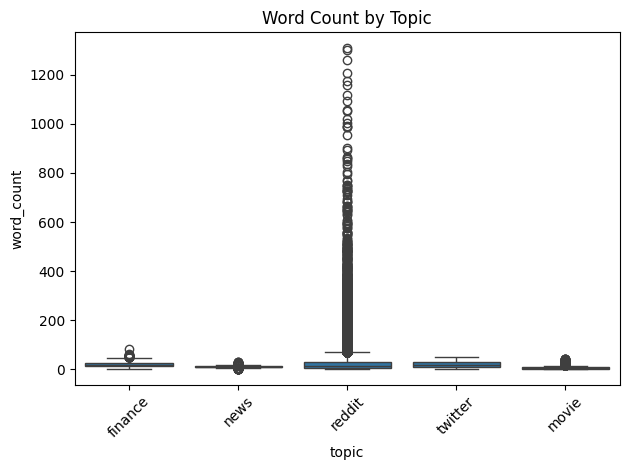

In [41]:
# Boxplot of word count

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(x = 'topic', y = 'word_count', data = df_all)
plt.xticks(rotation=45)
plt.title('Word Count by Topic')
plt.tight_layout()
plt.show()

The median inut lengths are between 4 and 20 for each topic. To obtain more convergent distribution, all observations with longer than 50 words will be removed.

In [42]:
df_all = df_all[df_all['word_count'] <= 50] # 5,312 observations were removed
df_all.shape

(260405, 4)

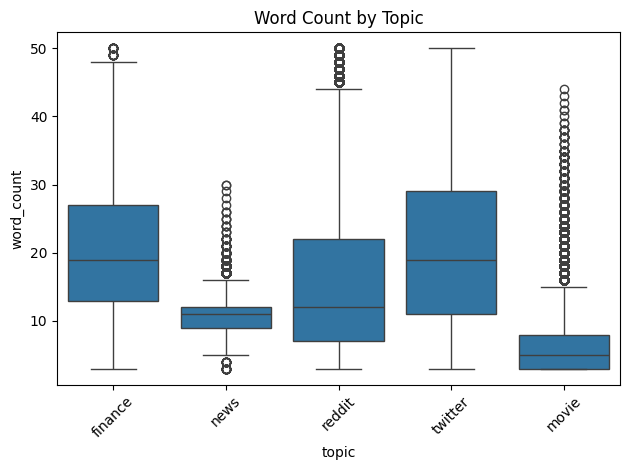

In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(x = 'topic', y = 'word_count', data = df_all)
plt.xticks(rotation=45)
plt.title('Word Count by Topic')
plt.tight_layout()
plt.savefig("/content/drive/My Drive/BA THESIS/analysis/raw_word_count_distribution_box.png")
plt.show()

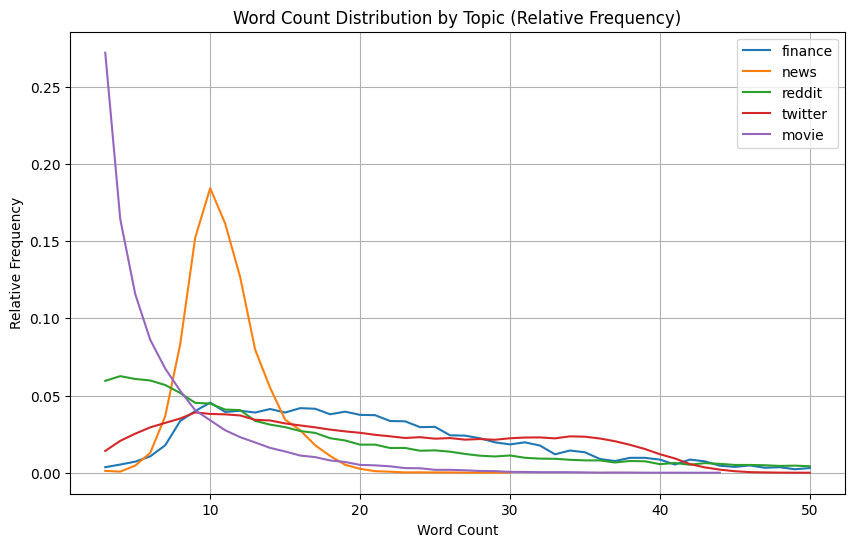

In [44]:

plt.figure(figsize=(10, 6))

for topic in df_all['topic'].unique():
    topic_data = df_all[df_all['topic'] == topic]['word_count']
    values, counts = topic_data.value_counts().sort_index().values, topic_data.value_counts().sort_index().index
    relative_freq = values/values.sum()
    plt.plot(counts, relative_freq, label=topic, marker=None)

plt.xlabel("Word Count")
plt.ylabel("Relative Frequency")
plt.title("Word Count Distribution by Topic (Relative Frequency)")
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/My Drive/BA THESIS/analysis/raw_word_count_distribution_line.png")
plt.show()


In [45]:
df_all.shape

(260405, 4)

In [46]:
table = pd.crosstab(df_all["ground_truth"], df_all["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,589,4021,9712,6589,35467,56378
neutral,2854,40078,1544,10893,54287,109656
positive,1839,5049,3607,11845,72031,94371
All,5282,49148,14863,29327,161785,260405


In [47]:
table.to_csv("/content/drive/My Drive/BA THESIS/analysis/raw_table_sentiment_topic_distribution.csv")

Accross all topics except for news, the "negative" class is the least represented. In all these categories we will resample the "neutral" and "positive" category to have the categories balanced within topics. In case of the news data, we resample it to the neutral category.

In [48]:
from sklearn.utils import resample

In [49]:
def balance_ground_truth(group):

    # counts of each class in this group
    class_counts = group["ground_truth"].value_counts()

    # minimum count among the classes
    min_count = class_counts.min()

    # Resample each class to the minimum count
    balanced_dfs = []
    for label in class_counts.index:
        df_class = group[group["ground_truth"] == label]

        # Only resample if the class has more than min_count
        if len(df_class) > min_count:
            df_class = resample(df_class, replace=False, n_samples=min_count, random_state=42)

        balanced_dfs.append(df_class)

    # Combine all balanced class DataFrames
    return pd.concat(balanced_dfs).reset_index(drop=True)

# Apply the resampling function to each topic separately
df_resampled = df_all.groupby("topic", group_keys=False).apply(balance_ground_truth)

print(df_resampled.groupby(["topic", "ground_truth"]).size())

topic    ground_truth
finance  negative          589
         neutral           589
         positive          589
movie    negative         4021
         neutral          4021
         positive         4021
news     negative         1544
         neutral          1544
         positive         1544
reddit   negative         6589
         neutral          6589
         positive         6589
twitter  negative        35467
         neutral         35467
         positive        35467
dtype: int64


<ipython-input-49-c1e6e2a269e7>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df_all.groupby("topic", group_keys=False).apply(balance_ground_truth)


Now the sentiments are balanced but the topics still need to be balanced. To not loose to many observations we will sample down each topic that has more than 2,000 observations per sentiment to 2,000. This concerns reddit, twitter and movies topics.

In [50]:
# sample down to 2,000 each label in movie, reddit and twitter

sample_topics = ['movie', 'reddit', 'twitter']

# Split the data into two parts:
# 1. Rows where the topic is one of the sample_topics
df_to_sample = df_resampled[df_resampled['topic'].isin(sample_topics)]
# 2. Rows where the topic is not one of the sample_topics (to be retained as-is)
df_remaining = df_resampled[~df_resampled['topic'].isin(sample_topics)]

# For each ground_truth category within the sample topics, randomly sample 2000 rows.
sampled_df = df_to_sample.groupby(['ground_truth', 'topic'], group_keys=False).apply(lambda x: x.sample(n=2000, random_state=222))

# Combine the sampled subset with the rest of the data.
df_resampled = pd.concat([sampled_df, df_remaining]).reset_index(drop=True)

# Optional: Verify counts
print(df_resampled.groupby(['topic', 'ground_truth']).size())

topic    ground_truth
finance  negative         589
         neutral          589
         positive         589
movie    negative        2000
         neutral         2000
         positive        2000
news     negative        1544
         neutral         1544
         positive        1544
reddit   negative        2000
         neutral         2000
         positive        2000
twitter  negative        2000
         neutral         2000
         positive        2000
dtype: int64


<ipython-input-50-8d6e7c0743e5>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df_to_sample.groupby(['ground_truth', 'topic'], group_keys=False).apply(lambda x: x.sample(n=2000, random_state=222))


In [51]:
# Shuffle the dataset
df_balanced = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [52]:
df_balanced = df_balanced.drop(columns=['word_count'])


In [53]:
df_balanced.head()

,text,ground_truth,topic
0,Public sector pension funds put millions in ta...,negative,news
1,well-written and occasionally challenging,positive,movie
2,A mesmerizing cinematic poem,positive,movie
3,Ca n't Stop The Music .,neutral,movie
4,hate break but was about happen 27th feb india...,negative,twitter


In [54]:
df_balanced.to_csv("/content/drive/My Drive/BA THESIS/data/df_balanced.csv", index=False)

# Text preprocessing

Naive Bayes and Bert require different processing. For Naive Bayes, first negations are treated, tehn stopwords are removed and finally all special characters and numbers are removed. For BERT only special characters and numbers are removed but stop words and negations do not need to eb treated differently.

In [55]:
df_nb = pd.read_csv("/content/drive/My Drive/BA THESIS/data/df_balanced.csv")
df_bert = pd.read_csv("/content/drive/My Drive/BA THESIS/data/df_balanced.csv")

In [56]:
import re
import nltk
from nltk.corpus import stopwords

In [57]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First negations are processed. In a sentence "not good" will become NOT_good or "I wasn't happy" will be NOT_happy.

In [58]:
def preprocess_negation(text):

    text = text.lower()
    # Tokenize by whitespace only
    words = text.split()

    processed_words = []
    i = 0
    while i < len(words):
        word = words[i]
        if word in ["no", "not", "nor", "wasn't", "weren't", "wouldn't", "won't", "can't", "couldn't",
                   "hasn't", "haven't", "hadn't", "isn't", "aren't", "shouldn't", "shan't", "needn't",
                   "mightn't", "don't", "doesn't"]:
            if i + 1 < len(words):
                processed_words.append("NOT_" + words[i+1])
                i += 2  # Skip the next word as it's already processed
            else:
                processed_words.append(word) # Handle the case where negation word is the last word
                i += 1
        elif word in stop_words:
            i += 1
            continue
        else:
            processed_words.append(word)
            i += 1
    return " ".join(processed_words)

In [59]:
df_nb['text'] = df_nb['text'].apply(preprocess_negation)


Then special characers and numbers are removed.

In [60]:
import re

def remove_special_characters_and_numbers(text):
    # Keep only letters, spaces, and "NOT_"
    text = re.sub(r'[^a-zA-Z\sNOT_]', '', text)
    return text

In [61]:
df_nb['text'] = df_nb['text'].apply(remove_special_characters_and_numbers)


In [62]:
df_bert['text'] = df_bert['text'].apply(remove_special_characters_and_numbers)

In [63]:
df_nb.head()

,text,ground_truth,topic
0,public sector pension funds put millions tax h...,negative,news
1,wellwritten occasionally challenging,positive,movie
2,mesmerizing cinematic poem,positive,movie
3,ca nt stop music,neutral,movie
4,hate break happen th feb india alerted america...,negative,twitter


In [64]:
df_bert.head()

,text,ground_truth,topic
0,Public sector pension funds put millions in ta...,negative,news
1,wellwritten and occasionally challenging,positive,movie
2,A mesmerizing cinematic poem,positive,movie
3,Ca nt Stop The Music,neutral,movie
4,hate break but was about happen th feb india a...,negative,twitter


Stop words, numbers and special characters have been removed. Now we inspect if any text input remains empty after this processing.

In [65]:
df_nb.shape == df_bert.shape

True

In [66]:
import numpy as np

In [67]:
df_nb["text"] = df_nb["text"].replace(r'^\s*$', np.nan, regex=True)
df_bert["text"] = df_bert["text"].replace(r'^\s*$', np.nan, regex=True)

print(df_nb.isna().sum(), df_bert.isna().sum())  # See NaN counts

text            25
ground_truth     0
topic            0
dtype: int64 text            11
ground_truth     0
topic            0
dtype: int64


In [68]:
pattern = re.compile(r'^\s*nan\s*$', flags=re.IGNORECASE)

df_nb["text"] = df_nb["text"].replace(pattern, np.nan, regex=True)
df_bert["text"] = df_bert["text"].replace(pattern, np.nan, regex=True)

print(df_nb.isna().sum(), df_bert.isna().sum())  # See NaN counts

text            25
ground_truth     0
topic            0
dtype: int64 text            11
ground_truth     0
topic            0
dtype: int64


In [69]:

# Drop rows with NA values in 'text' column of df_nb
df_nb.dropna(inplace=True)

# Get the index of rows that were dropped from df_nb
index_to_drop = df_bert.index.difference(df_nb.index)

# Drop the same observations from df_bert
df_bert.drop(index_to_drop, inplace=True)


In [70]:
# prompt: reset the index for both

# Reset index for df_nb and df_bert
df_nb = df_nb.reset_index(drop=True)
df_bert = df_bert.reset_index(drop=True)


In [71]:
df_nb.shape == df_bert.shape

True

After processing, some text inputs remained empty. These were also removed

In [72]:
table = pd.crosstab(df_bert["ground_truth"], df_bert["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,589,2000,1544,2000,2000,8133
neutral,589,1988,1544,1988,1999,8108
positive,589,2000,1544,2000,2000,8133
All,1767,5988,4632,5988,5999,24374


In [73]:
table.to_csv("/content/drive/My Drive/BA THESIS/analysis/raw_table_sentiment_topic_distribution_after_processing.csv")

In [74]:
df_bert.head(10)

,text,ground_truth,topic
0,Public sector pension funds put millions in ta...,negative,news
1,wellwritten and occasionally challenging,positive,movie
2,A mesmerizing cinematic poem,positive,movie
3,Ca nt Stop The Music,neutral,movie
4,hate break but was about happen th feb india a...,negative,twitter
5,thank you for writing this have been procrasti...,neutral,reddit
6,how did youll verify that project was going pe...,neutral,reddit
7,Cyber security review may spell end for Huawei...,negative,news
8,Global alarm bells sound over fullblown trade war,negative,news
9,this sad alexa play mandir wahi banayenge,negative,reddit


# Lemmatizing

Additionnal processing is required for the Naive Bayes model. Both stemming and lemmatizing will be tried.

In [75]:
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [76]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [77]:
lemmatizer = WordNetLemmatizer()

In [78]:
def get_wordnet_pos(word):
    """Map POS tag to first character for lemmatization"""
    from nltk.corpus import wordnet
    from nltk import pos_tag

    tag = pos_tag([word])[0][1][0].upper()  # Get the POS tag and first letter
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [79]:
df_NB_lem = df_nb.copy()

def lemm_text(text):

    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stop_words]
    # Reconstruct the text
    return ' '.join(words)

# Apply preprocessing to the text column
df_NB_lem["text"] = df_NB_lem["text"].astype(str).apply(lemm_text)


# Stemming

In [80]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

df_NB_stem = df_nb.copy()

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def stem_text(text):
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and stem words
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Reconstruct the text
    return ' '.join(words)

# Apply stemming to the text column
df_NB_stem["text"] = df_NB_stem["text"].astype(str).apply(stem_text)


In [81]:
df_NB_lem.head(10)

,text,ground_truth,topic
0,public sector pension fund put million tax hav...,negative,news
1,wellwritten occasionally challenge,positive,movie
2,mesmerize cinematic poem,positive,movie
3,ca nt stop music,neutral,movie
4,hate break happen th feb india alert american ...,negative,twitter
5,thank write procrastinate forever thank randians,neutral,reddit
6,youll verify project go per track execution,neutral,reddit
7,cyber security review may spell end huawei g deal,negative,news
8,global alarm bell sound fullblown trade war,negative,news
9,sad alexa play mandir wahi banayenge,negative,reddit


In [82]:
df_NB_stem.head(10)

,text,ground_truth,topic
0,public sector pension fund put million tax hav...,negative,news
1,wellwritten occasion challeng,positive,movie
2,mesmer cinemat poem,positive,movie
3,ca nt stop music,neutral,movie
4,hate break happen th feb india alert american ...,negative,twitter
5,thank write procrastin forev thank randian,neutral,reddit
6,youll verifi project go per track execut,neutral,reddit
7,cyber secur review may spell end huawei g deal,negative,news
8,global alarm bell sound fullblown trade war,negative,news
9,sad alexa play mandir wahi banayeng,negative,reddit


In [83]:
table = pd.crosstab(df_balanced["ground_truth"], df_balanced["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,589,2000,1544,2000,2000,8133
neutral,589,2000,1544,2000,2000,8133
positive,589,2000,1544,2000,2000,8133
All,1767,6000,4632,6000,6000,24399


# Data Split
We split the data into 70% train, 10% validation and 20% test data.

In [84]:
from sklearn.model_selection import train_test_split

# First, split into 80% train+val and 20% test (stratifying on both 'topic' and 'ground_truth')
train_val_NB_lem, test_NB_lem = train_test_split(df_NB_lem, test_size=0.2, stratify=df_NB_lem[['topic', 'ground_truth']], random_state=222)

# Now, split train_val into 70% train and 10% validation
train_NB_lem, val_NB_lem = train_test_split(train_val_NB_lem, test_size=0.125, stratify=train_val_NB_lem[['topic', 'ground_truth']], random_state=222)
# (0.125 * 80% = 10% of the total data)

In [85]:
train_NB_lem.head()

,text,ground_truth,topic
13484,easyjet plan cut staff covid hit demand,positive,news
20067,undoubtedly one fine film year,positive,movie
17350,gym pool nail bar new rule england allow,positive,news
8285,see lot answer include wait release party mani...,positive,reddit
8456,competition regulator likely choke sainsburysa...,neutral,news


In [86]:

# First, split into 80% train+val and 20% test (stratifying on both 'topic' and 'ground_truth')
train_val_NB_stem, test_NB_stem = train_test_split(df_NB_stem, test_size=0.2, stratify=df_NB_stem[['topic', 'ground_truth']], random_state=222)

# Now, split train_val into 70% train and 10% validation
train_NB_stem, val_NB_stem = train_test_split(train_val_NB_stem, test_size=0.125, stratify=train_val_NB_stem[['topic', 'ground_truth']], random_state=222)
# (0.125 * 80% = 10% of the total data)

In [87]:
train_NB_stem.head()


,text,ground_truth,topic
13484,easyjet plan cut staff covid hit demand,positive,news
20067,undoubtedli one finest film year,positive,movie
17350,gym pool nail bar new rule england allow,positive,news
8285,see lot answer includ wait releas parti manife...,positive,reddit
8456,competit regul like choke sainsburysasda deal,neutral,news


In [88]:
table = pd.crosstab(train_NB_stem["ground_truth"], train_NB_stem["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,412,1400,1080,1400,1400,5692
neutral,412,1392,1081,1392,1399,5676
positive,412,1400,1081,1400,1400,5693
All,1236,4192,3242,4192,4199,17061


In [89]:
#table = pd.crosstab(test_NB["ground_truth"], test_NB["topic"], margins=True)
#table.columns.name = None
#table

In [90]:
# First, split into 80% train+val and 20% test (stratifying on both 'topic' and 'ground_truth')
train_val_BERT, test_BERT = train_test_split(df_bert, test_size=0.2, stratify=df_bert[['topic', 'ground_truth']], random_state=222)

# Now, split train_val into 70% train and 10% validation
train_BERT, val_BERT = train_test_split(train_val_BERT, test_size=0.125, stratify=train_val_BERT[['topic', 'ground_truth']], random_state=222)
# (0.125 * 80% = 10% of the total data)

In [91]:
train_BERT.head()

,text,ground_truth,topic
13484,EasyJet plans to cut up to of staff as Covid ...,positive,news
20067,is undoubtedly one of the finest films of the ...,positive,movie
17350,Gyms pools and nail bars what the new rules in...,positive,news
8285,see lot your answers include wait for the rel...,positive,reddit
8456,Competition regulator likely to choke on Sains...,neutral,news


In [92]:
table = pd.crosstab(train_BERT["ground_truth"], train_BERT["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,412,1400,1080,1400,1400,5692
neutral,412,1392,1081,1392,1399,5676
positive,412,1400,1081,1400,1400,5693
All,1236,4192,3242,4192,4199,17061


# Save the data

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
path = "/content/drive/My Drive/BA THESIS/data"

In [95]:
# Save the data
train_NB_lem.to_csv(os.path.join(path, 'train_NB_lem.csv'), index=False)
val_NB_lem.to_csv(os.path.join(path, 'val_NB_lem.csv'), index=False)
test_NB_lem.to_csv(os.path.join(path, 'test_NB_lem.csv'), index=False)

In [96]:
train_NB_stem.to_csv(os.path.join(path, 'train_NB_stem.csv'), index=False)
val_NB_stem.to_csv(os.path.join(path, 'val_NB_stem.csv'), index=False)
test_NB_stem.to_csv(os.path.join(path, 'test_NB_stem.csv'), index=False)

In [97]:
train_BERT.to_csv(os.path.join(path, 'train_BERT.csv'), index=False)
val_BERT.to_csv(os.path.join(path, 'val_BERT.csv'), index=False)
test_BERT.to_csv(os.path.join(path, 'test_BERT.csv'), index=False)